In [2]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator , TransformerMixin

from sklearn.linear_model import LinearRegression

In [5]:
x_train = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\ScaledTrainSet_data.csv' , index_col  = 'index')

In [6]:
x_train

,index.1,index.1.1,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,...,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
1596,1608,1608,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.645547,0.764326,1,0,0,0
1322,1329,1329,0,0,0,0,0,0,0,0,...,0,0,1,0.166667,0.188003,0.600759,0,0,0,1
1769,1782,1782,0,0,0,0,0,0,0,0,...,0,0,1,0.166667,0.050377,0.652751,0,0,0,1
1188,1193,1193,0,0,0,0,0,0,0,0,...,1,0,0,0.583333,0.027266,0.493359,0,1,0,0
1161,1166,1166,0,0,0,0,0,0,0,0,...,0,0,1,0.833333,1.000000,0.489943,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1650,1650,0,0,0,0,0,0,0,0,...,0,0,1,0.333333,0.122825,0.518027,0,1,0,0
1095,1100,1100,0,0,0,0,0,0,0,0,...,0,0,1,0.416667,0.142041,0.813283,1,0,0,0
1130,1135,1135,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.295767,0.675522,0,0,0,1


# Cross_Validation

In [7]:
x_target = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\TrainSet-target_data.csv', index_col='index')
#x_target

In [8]:
#Just to check - is the mean price valid?
x_target.mean()

price    104849.31825
dtype: float64

In [9]:
x_target[["price"]] = MinMaxScaler().fit_transform(x_target[["price"]]) 
x_target = x_target["price"]

In [10]:
#We decided to drop 'annual_licensing_fee' col because it is a function of each car's price.
    #x_train.drop(columns = "annual_licensing_fee", inplace=True) 
x_target

index
1596    0.467347
1322    0.122245
1769    0.183673
1188    0.046939
1161    0.872082
          ...   
1638    0.132653
1095    0.038776
1130    0.204082
1294    0.204082
860     0.063265
Name: price, Length: 2674, dtype: float64

# Scoring

In [11]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train, x_target)

In [118]:
#This method check which cv gives the best score.
    #if we make this one a function -> the function will return the bestCV
CV_COUNT = 100
maxScore = 0
bestCV = 0
bestScoreI = 0
scr = np.zeros(CV_COUNT)

for i in np.arange(2, CV_COUNT+2):
    bestScoreI = 0
    ind = cross_val_score(lin_reg, x_train, x_target, cv=i, scoring = "r2")
    for j in ind:
        if j > maxScore:
            maxScore = j
            bestCV = i
        if j > bestScoreI:
            scr[i-2] = pow(j, 2)    
    
print("r =", maxScore)
print("r^2 =", pow(maxScore, 2))
print("for cv =", bestCV)
#print(scr)
#print (cross_val_score(lin_reg, x_train, x_target, cv=14)) #a method to print scores by cv.

r = 0.9729875787518013
r^2 = 0.9467048284052928
for cv = 96


# Grid Search

### premitive way to do it (by loops), Aviya has a grid search function

Text(0, 0.5, 'r^2')

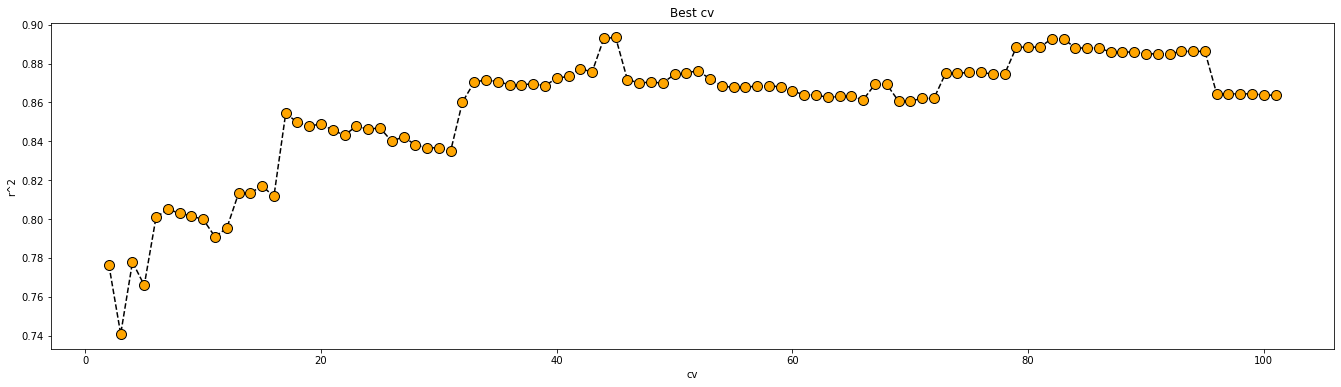

In [119]:
#a graph that show how our hyper-parameter (number of cv) infulence the accuracy of the model
plt.figure(figsize=(23, 6))
plt.plot(range(2, CV_COUNT+2), scr, color='black', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Best cv')
plt.xlabel('cv')
plt.ylabel('r^2')

# Saving and importing the a model

In [18]:
#saving the model
import joblib
joblib.dump(lin_reg, 'lin_reg_1.joblib')

['lin_reg_1.joblib']

In [ ]:
#importing a model (Don't press unless needed)
model1 = joblib.load('lin_reg_1.joblib')

# Dummy model trying

In [171]:
#Dummy-model method:
    #Checking the prices mean, and then its percent.
    #Count the prices that between (price+percent) and (price-percent), duo the price is a spesific number (10+ digits)
    #Divide those counted prices by the amount of prices.

x_target.mean() # 0.19357003724451638
x_target.mean()/100 # 0.0019357003724451637

maxLim = x_target.mean() + x_target.mean()/100
minLim = x_target.mean() - x_target.mean()/100

In [172]:
counter = x_target.where(x_target > minLim).where(x_target < maxLim).dropna().count()
print (counter / x_target.count())

0.014584891548242334
